In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def linear_theory(x_exp, y_exp):
    """
    :param x_exp: list -- experimental data for x-axis
    :param y_exp: list -- experimental data for y-axis
    :return: x_th, y_th -- lists with linear approximation of experimental data
    """
    k = np.polyfit(x_exp, y_exp, 1)
    m, M = min(x_exp), max(x_exp)
    x_th = np.arange(m - 0.05 * (M - m), M + 0.05 * (M - m), 0.0001 * (M - m))
    y_th = []
    for _ in range(0, len(x_th)):
        y_th.append(k[0] * x_th[_] + k[1])
    return x_th, y_th


def plot1(x_exp, y_exp, x_name, y_name, legend, x_err_formula_index=0, y_err_formula_index=0):
    """
    Function for drawing plot with one curve of points (x_exp, y_exp) with linear approximation and error-bars
    :param x_exp: list -- experimental data for x-axis
    :param y_exp: list -- experimental data for y-axis
    :param x_name: string -- name for x-axis
    :param y_name: string -- name for x-axis
    :param legend: string -- legend for plot
    :param x_err_formula_index: int -- index that represents number of standard formulas
                                       for calculating errors (see x_err_formula)
    :param y_err_formula_index: int -- index that represents number of standard formulas
                                       for calculating errors (see н_err_formula)
    :return: plot
    """
    x_th, y_th = linear_theory(x_exp, y_exp)
    xerr, yerr = error_function(x_exp, y_exp, x_err_formula_index, y_err_formula_index)
    plt.figure(figsize=(10, 5))
    plt.plot(x_th, y_th, label=legend)
    plt.errorbar(x_exp, y_exp, xerr, yerr, fmt=".k", label="Экспериментальные точки")

    plt.xlabel(x_name, fontsize=14)
    plt.ylabel(y_name, fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
    plt.show()


def plot_3_on_1(x_exp1, y_exp1, x_name1, y_name1, legend1, x_err_formula_index1, y_err_formula_index1,
                x_exp2, y_exp2, x_name2, y_name2, legend2, x_err_formula_index2, y_err_formula_index2,
                x_exp3, y_exp3, x_name3, y_name3, legend3, x_err_formula_index3, y_err_formula_index3, title):
    """
    Function for drawing plot with three subplots each containing one curve of points (x_exp, y_exp)
    with linear approximation and error-bars
    :param x_exp1: list -- experimental data for x-axis on subplot №1
    :param y_exp1: list -- experimental data for y-axis on subplot №1
    :param x_name1: string -- name for x-axis on subplot №1
    :param y_name1: string -- name for y-axis on subplot №1
    :param legend1: string -- legend for subplot №1
    :param x_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp2: list -- experimental data for x-axis on subplot №2
    :param y_exp2: list -- experimental data for y-axis on subplot №2
    :param x_name2: string -- name for x-axis on subplot №2
    :param y_name2: string -- name for y-axis on subplot №2
    :param legend2: string -- legend for subplot №2
    :param x_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp3: list -- experimental data for x-axis on subplot №3
    :param y_exp3: list -- experimental data for y-axis on subplot №3
    :param x_name3: string -- name for x-axis on subplot №3
    :param y_name3: string -- name for y-axis on subplot №3
    :param legend3: string -- legend for subplot №3
    :param x_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param title: string -- title for hole plot
    :return: plot
    """
    x_th1, y_th1 = linear_theory(x_exp1, y_exp1)
    xerr1, yerr1 = error_function(x_exp1, y_exp1, x_err_formula_index1, y_err_formula_index1)

    x_th2, y_th2 = linear_theory(x_exp2, y_exp2)
    xerr2, yerr2 = error_function(x_exp2, y_exp2, x_err_formula_index2, y_err_formula_index2)

    x_th3, y_th3 = linear_theory(x_exp3, y_exp3)
    xerr3, yerr3 = error_function(x_exp3, y_exp3, x_err_formula_index3, y_err_formula_index3)

    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.suptitle(title)
    ax0 = axs[0]
    ax0.plot(x_th1, y_th1, label=legend1)
    ax0.errorbar(x_exp1, y_exp1, xerr1, yerr1, fmt=".k", label="Экспериментальные точки")
    ax0.set_xlabel(x_name1, fontsize=14)
    ax0.set_ylabel(y_name1, fontsize=14)
    ax0.grid(True)
    ax0.legend(loc='best', fontsize=12)

    ax1 = axs[1]
    ax1.plot(x_th2, y_th2, label=legend2)
    ax1.errorbar(x_exp2, y_exp2, xerr2, yerr2, fmt=".k", label="Экспериментальные точки")
    ax1.set_xlabel(x_name2, fontsize=14)
    ax1.set_ylabel(y_name2, fontsize=14)
    ax1.grid(True)
    ax1.legend(loc='best', fontsize=12)

    ax2 = axs[2]
    ax2.plot(x_th3, y_th3, label=legend3)
    ax2.errorbar(x_exp3, y_exp3, xerr3, yerr3, fmt=".k", label="Экспериментальные точки")
    ax2.set_xlabel(x_name3, fontsize=14)
    ax2.set_ylabel(y_name3, fontsize=14)
    ax2.grid(True)
    ax2.legend(loc='best', fontsize=12)
    plt.show()


def plot_3_in_1(x_exp1, y_exp1, legend1, x_err_formula_index1, y_err_formula_index1,
                x_exp2, y_exp2, legend2, x_err_formula_index2, y_err_formula_index2,
                x_exp3, y_exp3, legend3, x_err_formula_index3, y_err_formula_index3, x_name, y_name):
    """
    Function for drawing plot with three curves of points (x_exp, y_exp)
    with linear approximation and error-bars
    :param x_exp1: list -- experimental data for x-axis
    :param y_exp1: list -- experimental data for y-axis
    :param legend1: string -- legend for curve №1
    :param x_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp2: list -- experimental data for x-axis
    :param y_exp2: list -- experimental data for y-axis
    :param legend2: string -- legend for curve №2
    :param x_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp3: list -- experimental data for x-axis
    :param y_exp3: list -- experimental data for y-axis
    :param legend3: string -- legend for curve №3
    :param x_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_name:  string -- name for x-axis on plot
    :param y_name:  string -- name for y-axis on plot
    :return: plot
    """
    x_th1, y_th1 = linear_theory(x_exp1, y_exp1)
    xerr1, yerr1 = error_function(x_exp1, y_exp1, x_err_formula_index1, y_err_formula_index1)

    x_th2, y_th2 = linear_theory(x_exp2, y_exp2)
    xerr2, yerr2 = error_function(x_exp2, y_exp2, x_err_formula_index2, y_err_formula_index2)

    x_th3, y_th3 = linear_theory(x_exp3, y_exp3)
    xerr3, yerr3 = error_function(x_exp3, y_exp3, x_err_formula_index3, y_err_formula_index3)

    plt.figure(figsize=(10, 5))
    plt.plot(x_th1, y_th1, label=legend1)
    plt.errorbar(x_exp1, y_exp1, xerr1, yerr1, fmt=".k")

    plt.plot(x_th2, y_th2, label=legend2)
    plt.errorbar(x_exp2, y_exp2, xerr2, yerr2, fmt=".k")

    plt.plot(x_th3, y_th3, label=legend3)
    plt.errorbar(x_exp3, y_exp3, xerr3, yerr3, fmt=".k")

    plt.xlabel(x_name, fontsize=17)
    plt.ylabel(y_name, fontsize=17)
    plt.grid(True)
    plt.legend(loc='best', fontsize=15)
    plt.show()


def plot_4_in_1(x_exp1, y_exp1, legend1, x_err_formula_index1, y_err_formula_index1,
                x_exp2, y_exp2, legend2, x_err_formula_index2, y_err_formula_index2,
                x_exp3, y_exp3, legend3, x_err_formula_index3, y_err_formula_index3,
                x_exp4, y_exp4, legend4, x_err_formula_index4, y_err_formula_index4, x_name, y_name):
    """
    Function for drawing plot with fore curves of points (x_exp, y_exp)
    with linear approximation and error-bars
    :param x_exp1: list -- experimental data for x-axis
    :param y_exp1: list -- experimental data for y-axis
    :param legend1: string -- legend for curve №1
    :param x_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp2: list -- experimental data for x-axis
    :param y_exp2: list -- experimental data for y-axis
    :param legend2: string -- legend for curve №2
    :param x_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp3: list -- experimental data for x-axis
    :param y_exp3: list -- experimental data for y-axis
    :param legend3: string -- legend for curve №3
    :param x_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp4: list -- experimental data for x-axis
    :param y_exp4: list -- experimental data for y-axis
    :param legend4: string -- legend for curve №4
    :param x_err_formula_index4: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index4: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_name: string -- name for x-axis on plot
    :param y_name: string -- name for y-axis on plot
    :return: plot
    """
    x_th1, y_th1 = linear_theory(x_exp1, y_exp1)
    xerr1, yerr1 = error_function(x_exp1, y_exp1, x_err_formula_index1, y_err_formula_index1)

    x_th2, y_th2 = linear_theory(x_exp2, y_exp2)
    xerr2, yerr2 = error_function(x_exp2, y_exp2, x_err_formula_index2, y_err_formula_index2)

    x_th3, y_th3 = linear_theory(x_exp3, y_exp3)
    xerr3, yerr3 = error_function(x_exp3, y_exp3, x_err_formula_index3, y_err_formula_index3)

    x_th4, y_th4 = linear_theory(x_exp4, y_exp4)
    xerr4, yerr4 = error_function(x_exp4, y_exp4, x_err_formula_index4, y_err_formula_index4)

    plt.figure(figsize=(10, 5))
    plt.plot(x_th1, y_th1, label=legend1)
    plt.errorbar(x_exp1, y_exp1, xerr1, yerr1, fmt=".k")

    plt.plot(x_th2, y_th2, label=legend2)
    plt.errorbar(x_exp2, y_exp2, xerr2, yerr2, fmt=".k")

    plt.plot(x_th3, y_th3, label=legend3)
    plt.errorbar(x_exp3, y_exp3, xerr3, yerr3, fmt=".k")

    plt.plot(x_th4, y_th4, label=legend4)
    plt.errorbar(x_exp4, y_exp4, xerr4, yerr4, fmt=".k")

    plt.xlabel(x_name, fontsize=17)
    plt.ylabel(y_name, fontsize=17)
    plt.grid(True)
    plt.legend(loc='best', fontsize=15)
    plt.show()


def x_err_formula(x_err_formula_index, x, y):
    """
    Function for calculating error for x-coordinate
    :param x_err_formula_index: int -- index that represents particular function error_x (x, y, ather parametrs)
                                       realized in x_err_formula function
    :param x: float -- x-coordinate from experimental data for calculating errors
    :param y: float -- y-coordinate from experimental data for calculating errors
    :return: float -- error of x-coordinate
    """
    if x_err_formula_index == 0:
        varepsilon = 0
        return abs(x) * varepsilon


def y_err_formula(y_err_formula_index, x, y):
    """
    Function for calculating error for y-coordinate
    :param y_err_formula_index: int -- index that represents particular function error_y (x, y, ather parametrs)
                                       realized in y_err_formula function
    :param x: float -- x-coordinate from experimental data for calculating errors
    :param y: float -- y-coordinate from experimental data for calculating errors
    :return: float -- error of y-coordinate
    """
    if y_err_formula_index == 0:
        varepsilon = 0
        return abs(y) * varepsilon


def error_function(x_exp, y_exp, x_err_formula_index, y_err_formula_index):
    """
    General function for calculating errors tha use particular formulas from x_err_formula and y_err_formula
    :param x_exp: list -- experimental data (x-coordinate)
    :param y_exp: list -- experimental data (y-coordinate)
    :param x_err_formula_index: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :return: x_err, y_err -- lists with errors for x- and y-coordinates
    """
    x_err = []
    y_err = []
    for _ in range(0, len(x_exp)):
        x_err.append(x_err_formula(x_err_formula_index, x_exp[_], y_exp[_]))
        y_err.append(y_err_formula(y_err_formula_index, x_exp[_], y_exp[_]))
    return x_err, y_err


def error_of_exp(x_exp, y_exp, flag=0):
    """
    Calculating errors of linear coefficients in experiment
    :param x_exp: list -- experimental data (x-coordinate)
    :param y_exp: list -- experimental data (y-coordinate)
    :param flag: int -- if flag == 0 function will print errors of linear coefficients in experiment
    :return: er_k, er_b -- float -- errors of linear coefficients in experiment
    """
    coefficient = np.polyfit(x_exp, y_exp, 1)
    k, b = coefficient[0], coefficient[1]
    av_x = 0
    for _ in range(len(x_exp)):
        av_x += x_exp[_]
    av_x = av_x / len(x_exp)

    av_y = 0
    for _ in range(len(y_exp)):
        av_y += y_exp[_]
    av_y = av_y / len(y_exp)

    D_x = 0
    for _ in range(len(x_exp)):
        D_x += (x_exp[_] - av_x)**2
    D_x = D_x / len(x_exp)

    D_y = 0
    for _ in range(len(y_exp)):
        D_y += (y_exp[_] - av_y) ** 2
    D_y = D_y / len(y_exp)

    av_x2 = 0
    for _ in range(len(x_exp)):
        av_x2 += x_exp[_]**2
    av_x2 = av_x2 / len(x_exp)

    er_k = np.sqrt(1/(len(x_exp)-2)*((D_y/D_x)-k**2))
    er_b = er_k * np.sqrt(av_x2)
    if flag == 0:
        print('Coefficions calculeted in linear approximation:')
        print("k = ", k, "+-", er_k)
        print("b = ", b, "+-", er_b)
    if flag == 1:
        return er_k, er_b


def data_reader(name, contacts, B):
    data = pd.read_csv(name)
    delta_ = data[(data.contacts == contacts) & (abs(data['-B, T']) == B)]['U, mV'].tolist()
    delta = []
    for i in range(0, len(delta_) - 1):
        if i % 2 == 0:
            delta.append(delta_[i] - delta_[i + 1])
    I_ = data[(data.contacts == contacts) & (abs(data['-B, T']) == B)]['I, mA'].tolist()
    I = []
    for i in range(0, len(I_) - 1):
        if i % 2 == 0:
            I.append(I_[i])
    return I, delta


def calculation(x_exp, y_exp, B, er_B):
    k = np.polyfit(x_exp, y_exp, 1)
    er_k, er_b = error_of_exp(x_exp, y_exp, 10)
    h = 50e-9  # толщина образца
    epsilon = ((er_k / k[0])**2 + (er_B / B)**2)**0.5
    delta = epsilon * abs(k[0] * h / B)
    print('R_H =', k[0] * h / B, '+-', delta)
    print('epsilon =', epsilon)




In [63]:
L=0.1
C0=(0.327*10**(-3)/5/2/np.pi)**2/L

In [64]:
data1=pd.read_excel("data.xlsx", sheet_name="2.2")
data1["Tth"]=2*np.pi*np.sqrt(L*(data1["Cad,мкф"]*10**(-6)+C0))*10**3
data1

,"T,мс","Cad,мкф",Tth
0,0.0654,0.000,0.065400
1,0.0910,0.001,0.090692
2,0.1105,0.002,0.110331
3,0.1272,0.003,0.126967
4,0.1425,0.004,0.141663
5,0.1550,0.005,0.154972
6,0.1670,0.006,0.167225
7,0.1780,0.007,0.178639
8,0.1890,0.008,0.189367
9,0.2000,0.009,0.199519


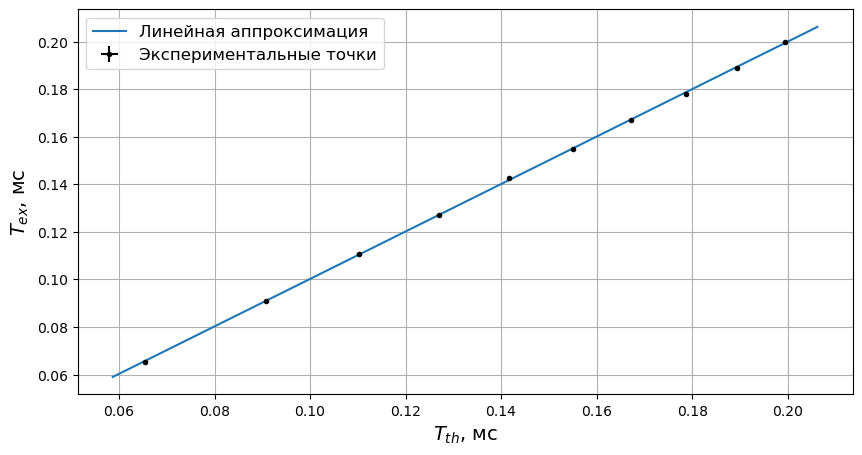

In [65]:
plot1(data1["Tth"], data1["T,мс"], "$T_{th}$, мс", "$T_{ex}$, мс", legend="Линейная аппроксимация")

In [66]:
error_of_exp(data1["Tth"], data1["T,мс"])

Coefficions calculeted in linear approximation:
k =  0.9974862941070536 +- 0.003308824202600954
b =  0.00044058905546422573 +- 0.000491251178739591


In [67]:
data2=pd.read_excel("data.xlsx", sheet_name="2.3")
data2["X"]=1/(data2["R,Rкр"])**2
data2["Y"]=1/(data2["Teta"])**2
data2

,Teta,"R,Rкр",X,Y
0,0.385,0.05,400.000000,6.746500
1,0.616,0.09,123.456790,2.635352
2,0.950,0.13,59.171598,1.108033
3,1.222,0.17,34.602076,0.669665
4,1.500,0.21,22.675737,0.444444
5,1.845,0.25,16.000000,0.293770


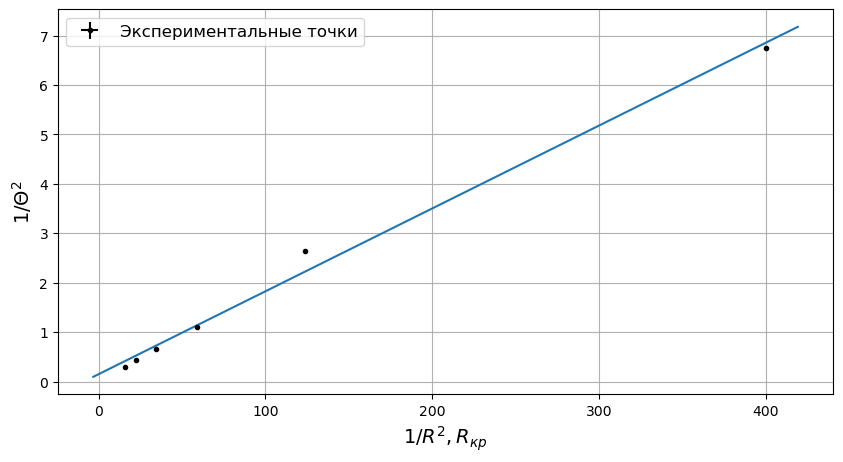

In [68]:
plot1(data2["X"],data2["Y"], "$1/R^2, R_{кр}$", "$1/Θ^2$", legend="")

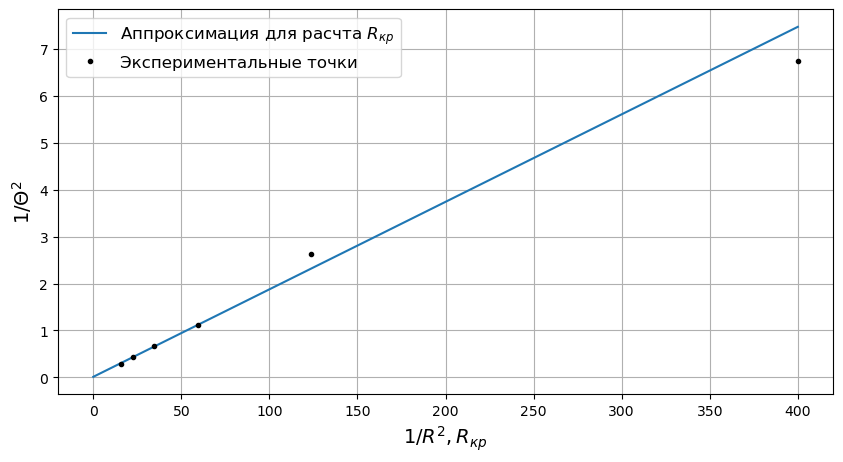

In [69]:
    x_th, y_th = linear_theory(data2["X"].iloc[2::], data2["Y"].iloc[2::])
    plt.figure(figsize=(10, 5))
    plt.plot(np.array([0, 400]), np.array([0, 400])*0.018656909810914567+0.01120395762938922, label="Аппроксимация для расчта $R_{кр}$")
    plt.errorbar(data2["X"],data2["Y"], fmt=".k", label="Экспериментальные точки")

    plt.xlabel("$1/R^2, R_{кр}$", fontsize=14)
    plt.ylabel("$1/Θ^2$", fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
    plt.show()

In [70]:
  error_of_exp(data2["X"].iloc[2::].to_numpy(), data2["Y"].iloc[2::].to_numpy())

Coefficions calculeted in linear approximation:
k =  0.018656909810914567 +- 0.0005152024747290472
b =  0.011203957629389227 +- 0.01904990443357842


In [71]:
data2

,Teta,"R,Rкр",X,Y
0,0.385,0.05,400.000000,6.746500
1,0.616,0.09,123.456790,2.635352
2,0.950,0.13,59.171598,1.108033
3,1.222,0.17,34.602076,0.669665
4,1.500,0.21,22.675737,0.444444
5,1.845,0.25,16.000000,0.293770


In [101]:
data005=pd.read_excel("data.xlsx", sheet_name="2.5(0.05)")
data025=pd.read_excel("data.xlsx", sheet_name="2.5(0.25)")
#data025["delta_x_muS"]-=14
data005["fi"]=0.5-np.abs(data005["delta_x_muS"]*data005["nu,kHz"]/1e3*2-0.5)
data025["fi"]=0.5-np.abs(data025["delta_x_muS"]*data025["nu,kHz"]/1e3*2-0.20-0.5)
data005

,"nu,kHz","U,В",delta_x_muS,fi
0,5.0,2.28,12.4,0.12400
1,5.1,2.64,12.8,0.13056
2,5.2,3.00,14.4,0.14976
3,5.3,3.40,15.2,0.16112
4,5.4,3.96,17.6,0.19008
5,5.5,4.60,18.8,0.20680
6,5.6,5.36,22.4,0.25088
7,5.7,6.24,26.0,0.29640
8,5.8,7.16,31.2,0.36192
9,5.9,7.92,36.4,0.42952


In [102]:
data025

,"nu,kHz","U,В",delta_x_muS,fi
0,4.00,0.89,48.0,0.184000
1,4.24,1.01,47.2,0.200256
2,4.48,1.17,47.6,0.226496
3,4.72,1.33,47.2,0.245568
4,4.96,1.50,48.0,0.276160
5,5.20,1.66,48.8,0.307520
6,5.44,1.83,49.6,0.339648
7,5.68,1.98,50.8,0.377088
8,5.92,2.08,52.4,0.420416
9,6.16,2.14,53.6,0.460352


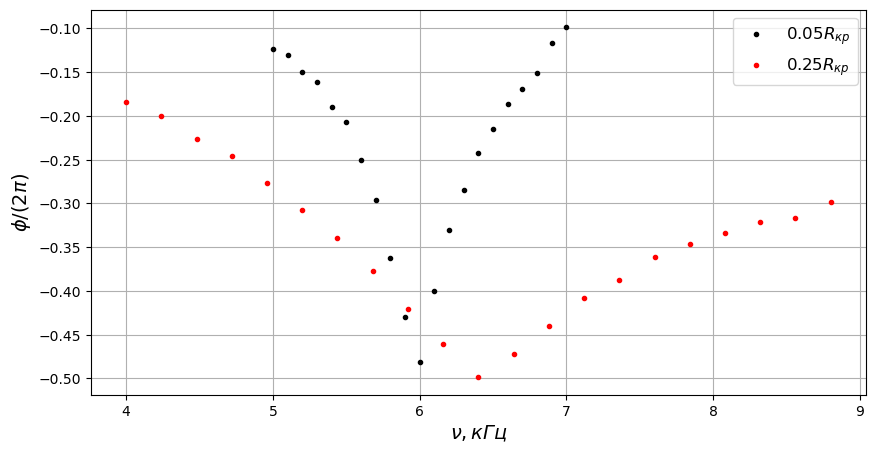

In [103]:
    plt.figure(figsize=(10, 5))
    plt.errorbar(data005["nu,kHz"],-data005["fi"], fmt=".k", label="$0.05R_{кр}$")
    plt.errorbar(data025["nu,kHz"],-data025["fi"], fmt=".r", label="$0.25R_{кр}$")
    plt.xlabel("$ \\nu , кГц $", fontsize=14)
    plt.ylabel("$\\phi/(2\\pi)$", fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
    plt.show()

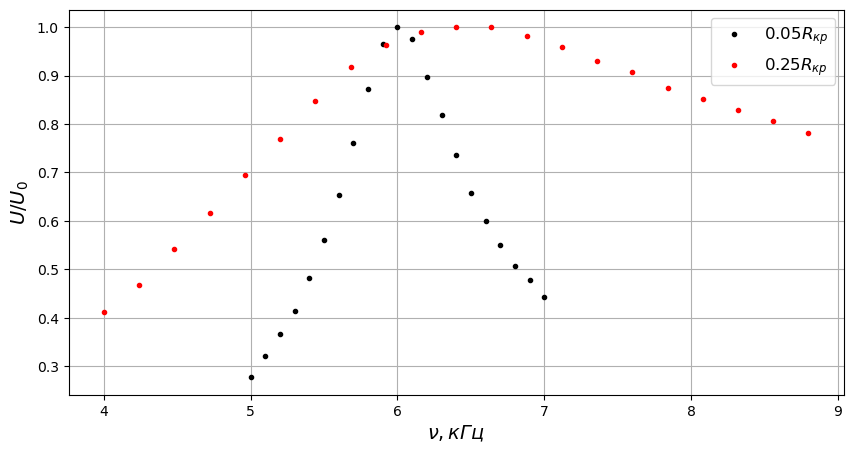

In [104]:
    plt.figure(figsize=(10, 5))
    plt.errorbar(data005["nu,kHz"],data005["U,В"]/8.2, fmt=".k", label="$0.05R_{кр}$")
    plt.errorbar(data025["nu,kHz"],data025["U,В"]/2.16, fmt=".r", label="$0.25R_{кр}$")
    plt.xlabel("$ \\nu , кГц $", fontsize=14)
    plt.ylabel("$U/U_0$", fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
    plt.show()